<a href="https://colab.research.google.com/github/Machinelearningdiscord/Machine-learning/blob/master/regularisation/cv/gridsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score as cv
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
boston=sklearn.datasets.load_boston()
X_train,X_test,y_train,y_test=train_test_split(boston.data,boston.target,test_size=0.3,random_state=42)
reg1=LinearRegression()
reg1.fit(X_train,y_train)
y_pred=reg1.predict(X_test)
print(mean_squared_error(y_test,y_pred))
reg1.score(X_test,y_test)




21.517444231176903


0.7112260057484974

In [0]:
score=cv(reg,boston.data,boston.target,cv=5)
print(score)
score.mean()

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


0.35327592439588484

In [0]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1,normalize=True)
ridge.fit(boston.data,boston.target)
score=cv(ridge,boston.data,boston.target,cv=5)
score.mean()


0.45392324833865755

0.3100926635931924


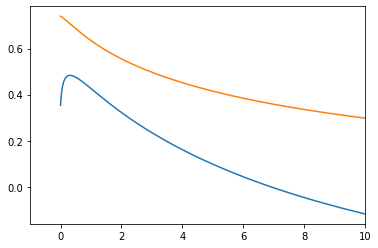

In [0]:
from sklearn.linear_model import Ridge

alpha_space = np.logspace(-10,1,1000)
ridge_scores = []
ridge_scores_std = []
cvscores=[]
ridge_no_cv=[]
ridge =Ridge(normalize=True)
for alpha in alpha_space:
  ridge.alpha =alpha
  ridge_cv_scores =cv(ridge,boston.data,boston.target,cv=5,scoring='r2')
  ridge=Ridge(alpha=alpha,normalize=True)
  ridge.fit(boston.data,boston.target)
  ridge_no_cv.append(ridge.score(boston.data,boston.target))
  cvscores.append(np.mean(cv_scores))
  ridge_scores.append(np.mean(ridge_cv_scores))
  ridge_scores_std.append(np.std(ridge_cv_scores))
  #print(str(ridge_scores)+' for alpha value '+str(alpha))
m=ridge_scores.index(max(ridge_scores))
max_aplha=alpha_space[m]
print(max_aplha)
plt.xlim(-1,10)
plt.plot(alpha_space,ridge_scores)
plt.plot(alpha_space,ridge_no_cv)
plt.show()

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': alpha_space}
reg=Ridge(normalize=True)
reg_cv = GridSearchCV(reg, param_grid, cv=5)
reg_cv.fit(boston.data,boston.target)
print(reg_cv.best_params_)
print(reg_cv.best_score_)



{'alpha': 0.3100926635931924}
0.4837747654122298
